##  CREDIT CARD DEFAULT PREDICTION

### Introduction

In the financial sector, predicting credit card default is a critical task for banks and lending institutions as it helps mitigate the risk of loan defaults and ensures financial stability. Credit card default occurs when a borrower fails to make the required minimum payment on their credit card balance, leading to significant financial losses for the issuing bank. Given the growing number of credit card holders and the inherent complexity of human financial behavior, predicting defaults based on historical data requires advanced techniques in data science and machine learning (ML).

#### Objective
The main objective of this project is to develop a predictive model that can estimate the probability of a customer defaulting on their credit card payments  
In this project, I aim to tackle this challenge using machine learning techniques to predict the likelihood of a customer defaulting on their credit card payments.This is a binary classification problem where the objective is to predict whether a customer will default on their credit card payments (default = 1) or not (no default = 0)..

. The dataset used for this project consists of several features such as age, income, credit limit, payment history, and previous credit card defaults, among others. These features provide valuable insights into a client’s financial behavior and can serve as critical indicators of potential default risk. By analyzing the patterns in these features, the project aims to create an accurate model that can predict whether a client is likely to default on their credit card payments.


##### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
###### LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
###### SEX: Gender (1 = male; 2 = female).
###### EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
###### MARRIAGE: Marital status (1 = married; 2 = single; 3 = others).
###### AGE: Age (year).
###### PAY_0 - PAY_6: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: PAY_0 = the repayment status in September, 2005; PAY_2 = the repayment status in August, 2005; . . .;PAY_6 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
###### BILL_AMT1-BILL_AMT6: Amount of bill statement (NT dollar). BILL_AMT1 = amount of bill statement in September, 2005; BILL_AMT2 = amount of bill statement in August, 2005; . . .; BILL_AMT6 = amount of bill statement in April, 2005.
###### PAY_AMT1-PAY_AMT6: Amount of previous payment (NT dollar). PAY_AMT1 = amount paid in September, 2005; PAY_AMT2 = amount paid in August, 2005; . . .;PAY_AMT6 = amount paid in April, 2005.

This project aims to predict credit card default using machine learning techniques. It begins with essential data preprocessing steps, including handling missing values, detecting outliers and applying numerical scaling to standardize features. After preprocessing, few machine learning models like Logistic RegressionNaive BayesM)Decision Tree and , KNN,etc. are to be used to build predictive models, which are to be then evaluated using several metrics. The project demonstrates how machine learning can be leveraged to assist financial institutions in reducing credit risk and making informed decisions about credit approvals.


### Import necessary libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score

### Load dataset

In [2]:
df = pd.read_csv("C:\\Users\\neenu\\Jupyter\\Assignments\\Final_Project\\Default_of_Credit_Card_Clients\\default_of_credit_card_clients.csv")
print(df)


          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

In [3]:
### Summary of data frame's structure

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
### Displays the first 5 rows of the DataFrame by default

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Displays the last 5 rows of the DataFrame by default

In [7]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [8]:
df.shape

(30000, 25)

### Summary statistics of the numerical columns in a DataFrame.

In [9]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.842267,1.557267,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.744494,0.521405,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### List of columns in the dataset

In [10]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

### Checking whether the dataset contains any null values

In [11]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

### Checking whether the dataset contains any duplicate values

In [12]:
df.duplicated().sum()

0

### Check for missing values and handle them

In [13]:
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


There are no missing values.

In [14]:
df['default payment next month'].value_counts()

default payment next month
0    23364
1     6636
Name: count, dtype: int64

## **DATA VISUALIZATION**

Text(0.5, 1.0, 'Default Count')

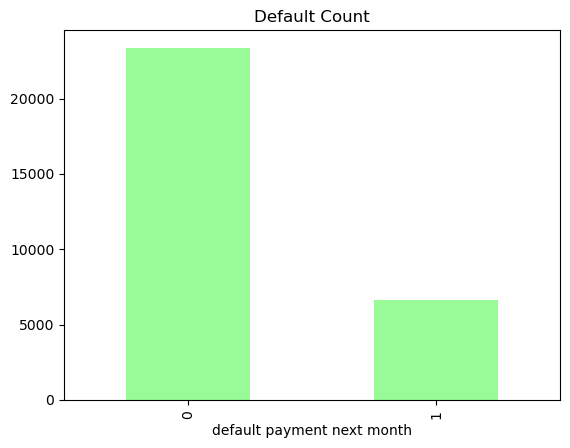

In [15]:
df['default payment next month'].value_counts().plot.bar(color='palegreen') # default payment (Yes = 1, No = 0)
plt.title('Default Count')

The above bar graph indicates that the number of non defaulters are higher than that of defaulters.

In [16]:
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

Text(0.5, 1.0, 'Education')

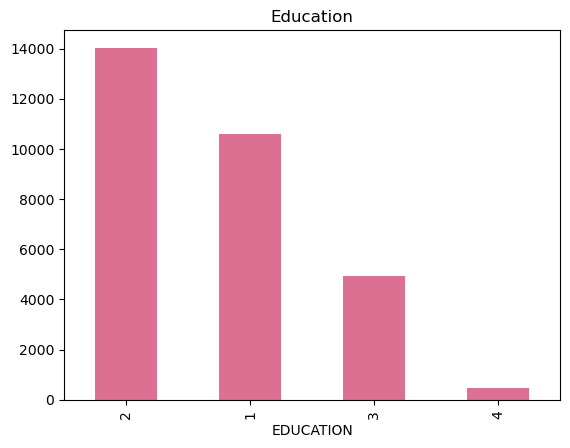

In [17]:
df['EDUCATION'].value_counts().plot.bar(color='palevioletred')
plt.title('Education')
#1=graduate school,2=university,3=high school,4=others

The above bar graph indicates a high level of educational attainment, with most of the credit card clients having completed university or graduate school.


In [18]:
df['AGE'].value_counts()

AGE
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: count, dtype: int64

Text(0.5, 1.0, 'Age-wise Distribution of Default Payment Predictions for Next Month')

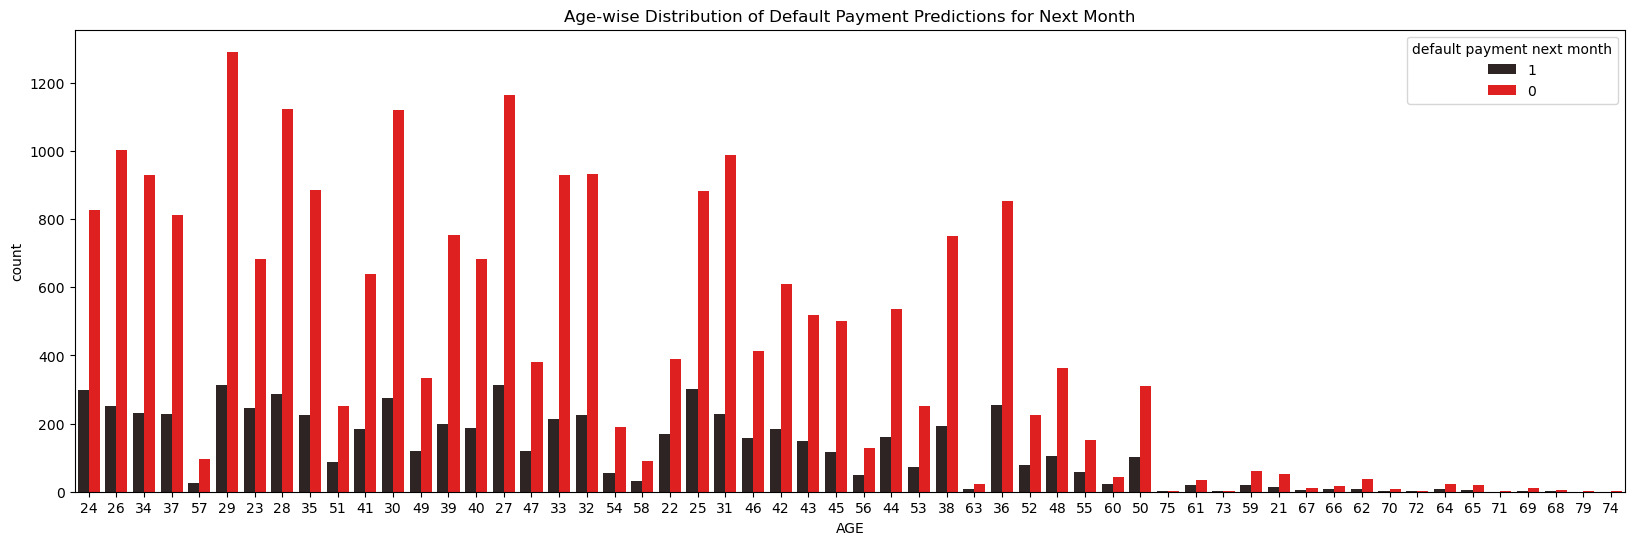

In [20]:
df['default payment next month'] = df['default payment next month'].astype(str)
df['AGE'] = df['AGE'].astype(str)
plt.figure(figsize=(20, 6))

sns.countplot(data=df,x = df['AGE'],hue =df['default payment next month'],palette='dark:red')
plt.title('Age-wise Distribution of Default Payment Predictions for Next Month')

### From the above count plot:


*   The majority of individuals, particularly in younger age groups, are not expected to default on their payments.
*   Also, there is a notable decrease in count as the age increases,indicating fewer defaults among older age groups.





In [21]:
df['LIMIT_BAL'].value_counts()

LIMIT_BAL
50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: count, Length: 81, dtype: int64

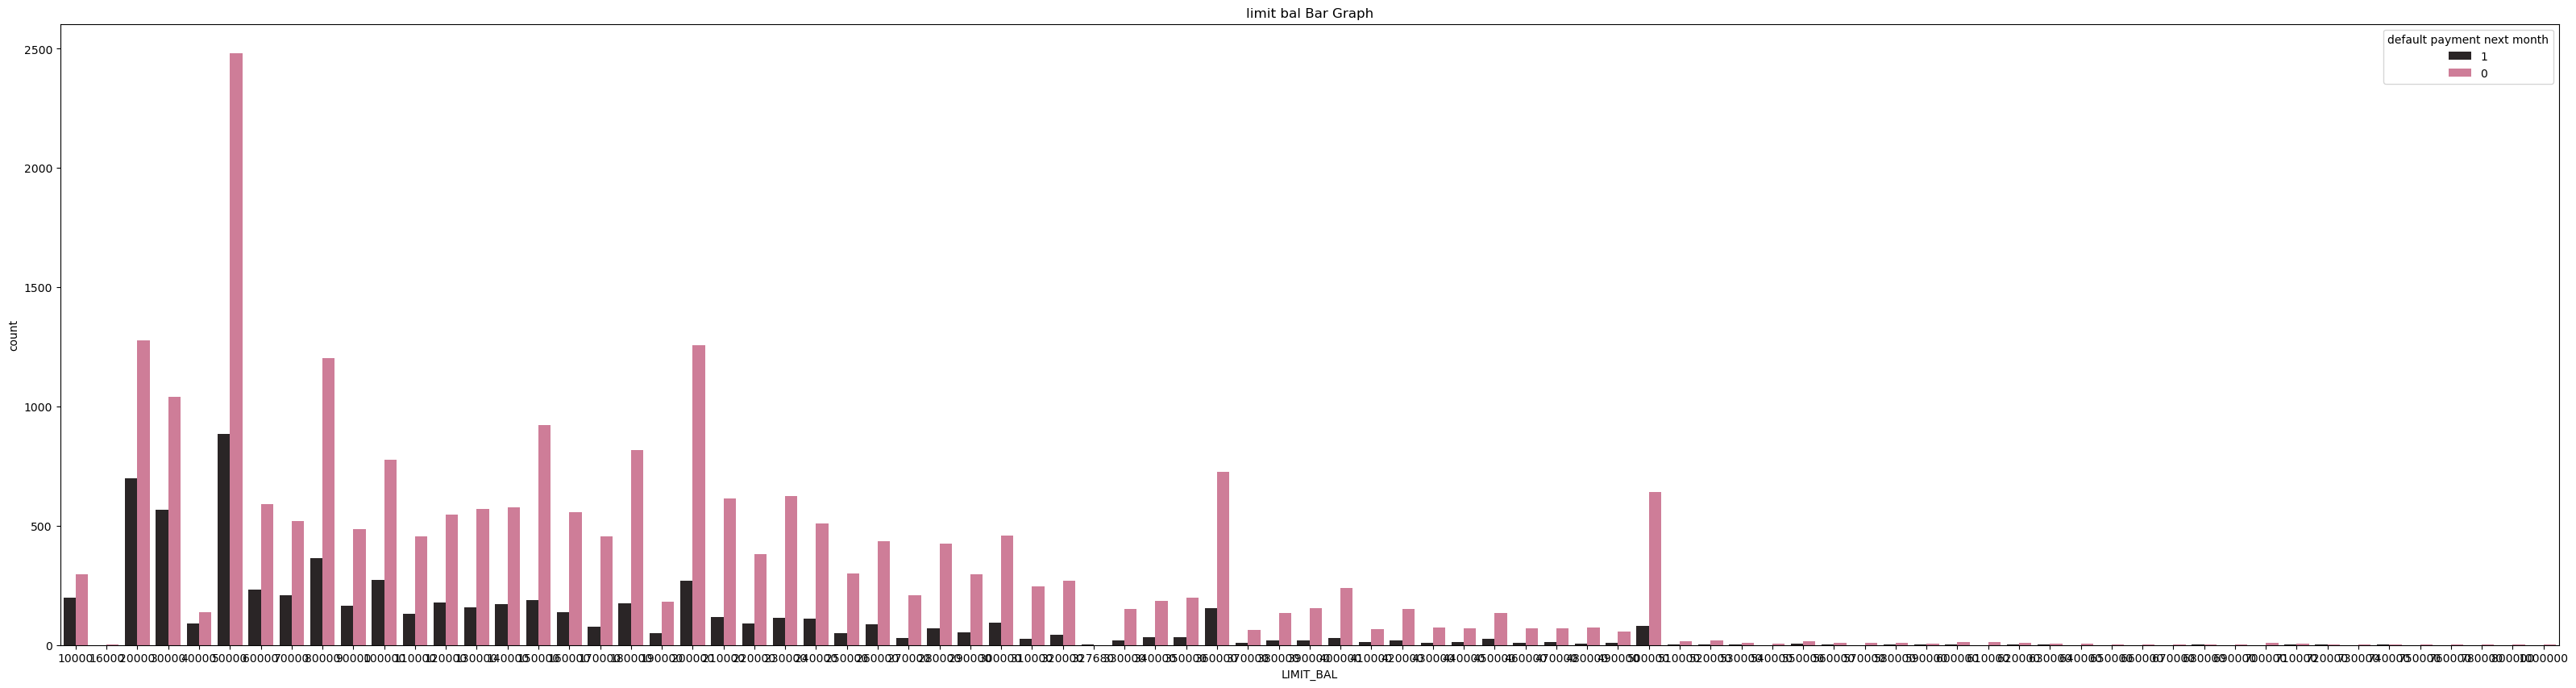

In [23]:
#f['LIMIT_BAL'] = df['LIMIT_BAL'].astype(str)
df['default payment next month'] = df['default payment next month'].astype(str)
plt.figure(figsize=(40, 10))
sns.countplot(data=df,x = 'LIMIT_BAL',hue ='default payment next month',palette='dark:palevioletred')
plt.title('limit bal Bar Graph')
plt.show()

Analyzing the distribution of credit limit(LIMIT_BAL) in relation to default behavior helps in understanding how the available credit might relate to the likelihood of default.
The graph indicates that customers with lower credit limits are more common and show a higher count of both default and non-default instances, suggesting a potential link between lower credit limits and increased default risk, though most customers in this group still successfully meet their payments.

In [24]:
df['SEX'].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

Text(0.5, 1.0, 'Gender')

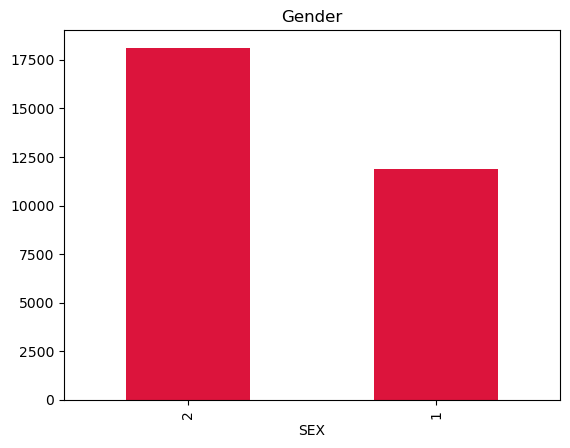

In [25]:
df['SEX'].value_counts().plot.bar(color='crimson')  # Gender (1 = male; 2 = female).
plt.title('Gender')

The bar chart shows the distribution of gender among credit card clients, where category 1 represents males and category 2 represents females.This suggests that female customers make up the majority of the credit card client base in this data.

In [26]:
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

Text(0.5, 1.0, 'Marital status ')

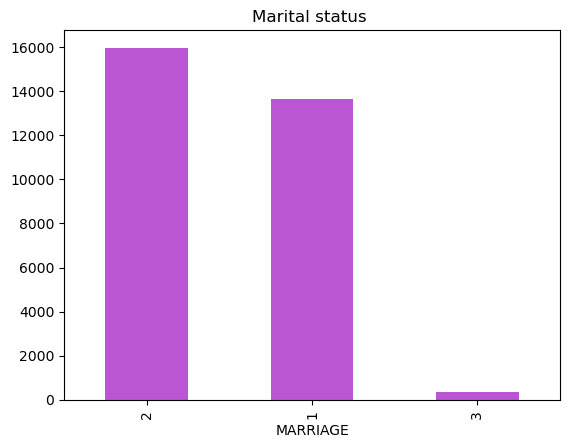

In [27]:
df['MARRIAGE'].value_counts().plot.bar(color='mediumorchid')  # Marital status (1 = married; 2 = single; 3 = others).
plt.title('Marital status ')

Based on the marital status distribution of credit card holders, it appears that a significant portion of them are married, followed by singles and a smaller group falling under other marital statuses. This trend suggests that credit card ownership may be more common among individuals with stable, committed lifestyles, possibly due to financial responsibilities associated with marriage.

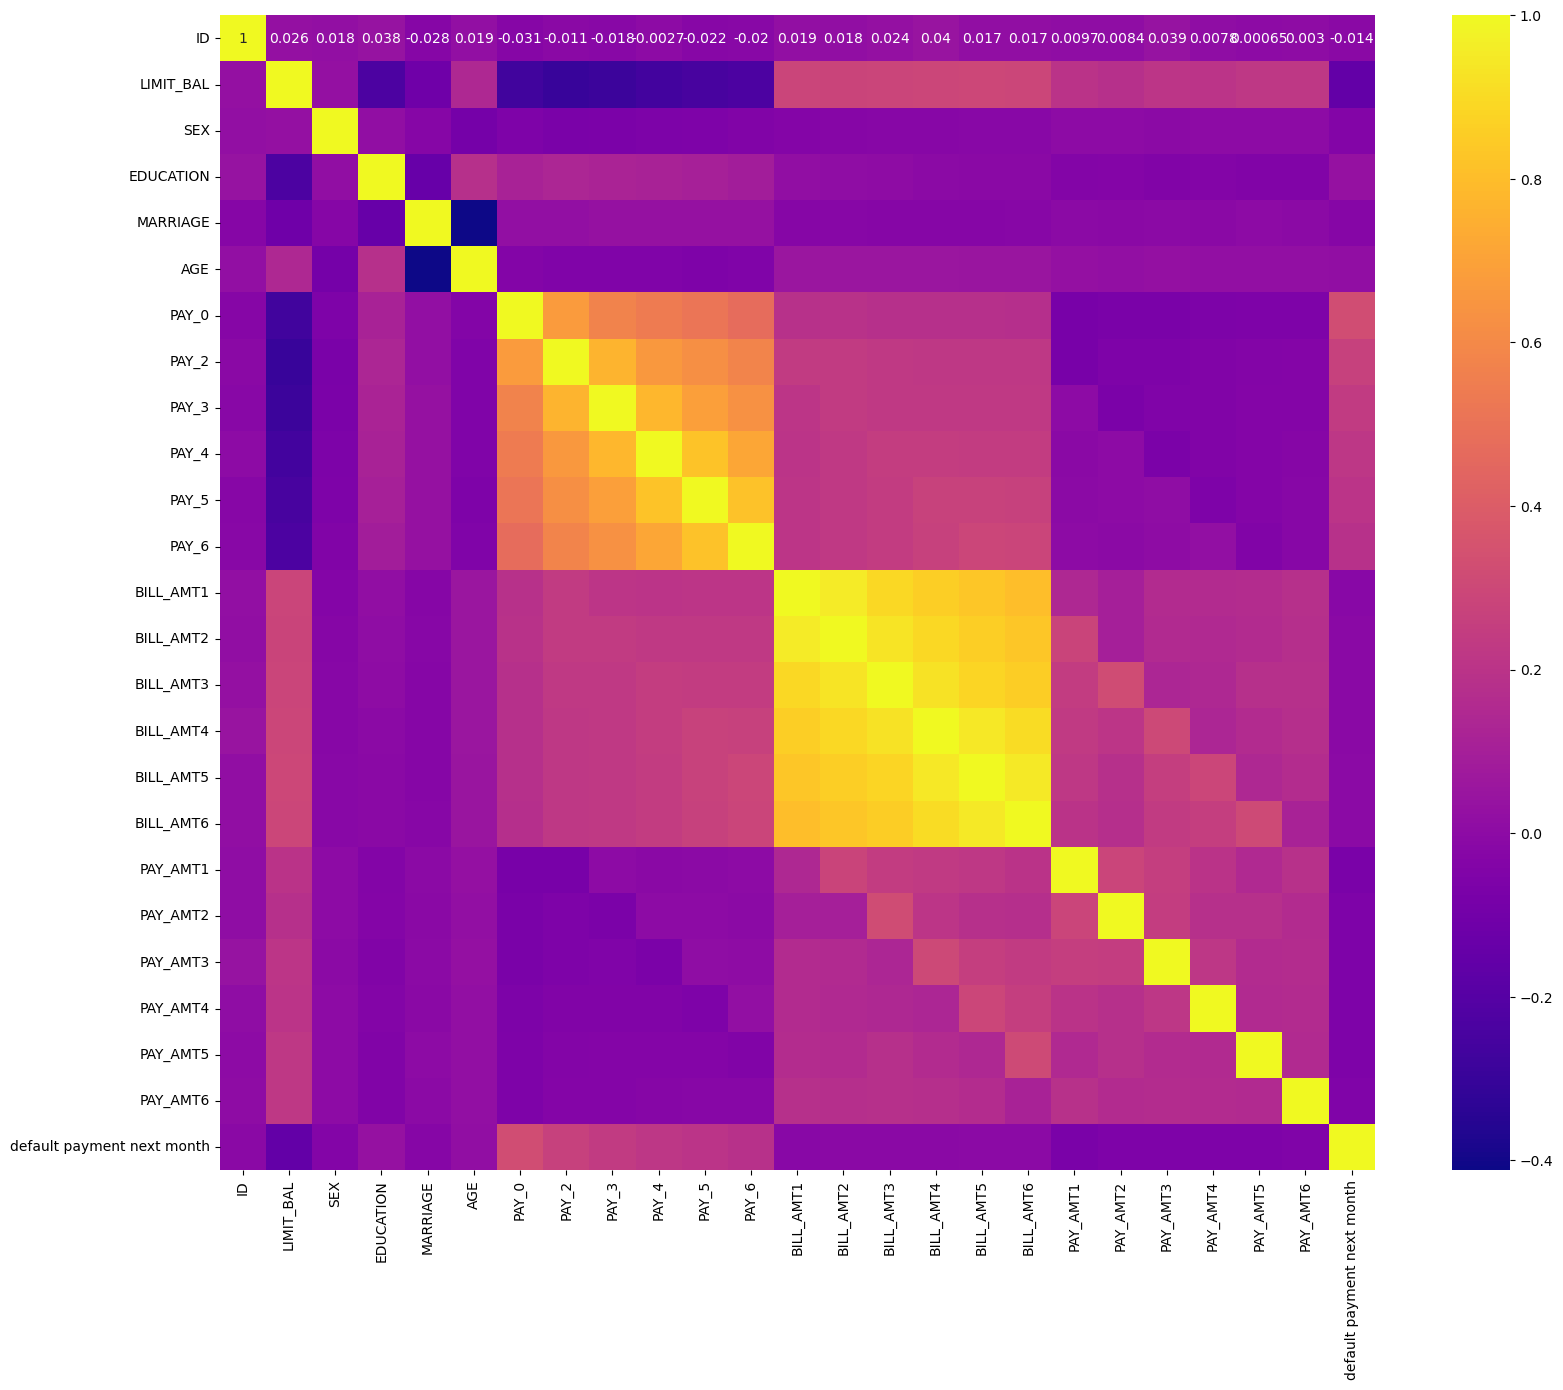

In [28]:
corrmat = df.corr() #finding the correlation
# Draw the heatmap
f, ax = plt.subplots(figsize=(20,15))
sns.heatmap(corrmat, annot=True, square=True, cmap='plasma')
plt.show()

The heatmap analysis shows that recent payment behavior, especially recent delays (PAY_0 and PAY_2), is the strongest predictor of credit card default next month. This suggests that recent payment history plays a crucial role in assessing default risk. Demographic factors such as age, sex, education, and marital status have minimal impact, indicating they are weak predictors on their own. Consistent billing amounts across months reflect stable spending but don’t strongly predict default, while credit limit also has limited predictive power. Overall, focusing on recent payment patterns provides the most valuable insights for predicting credit card default.

### Outlier Detection

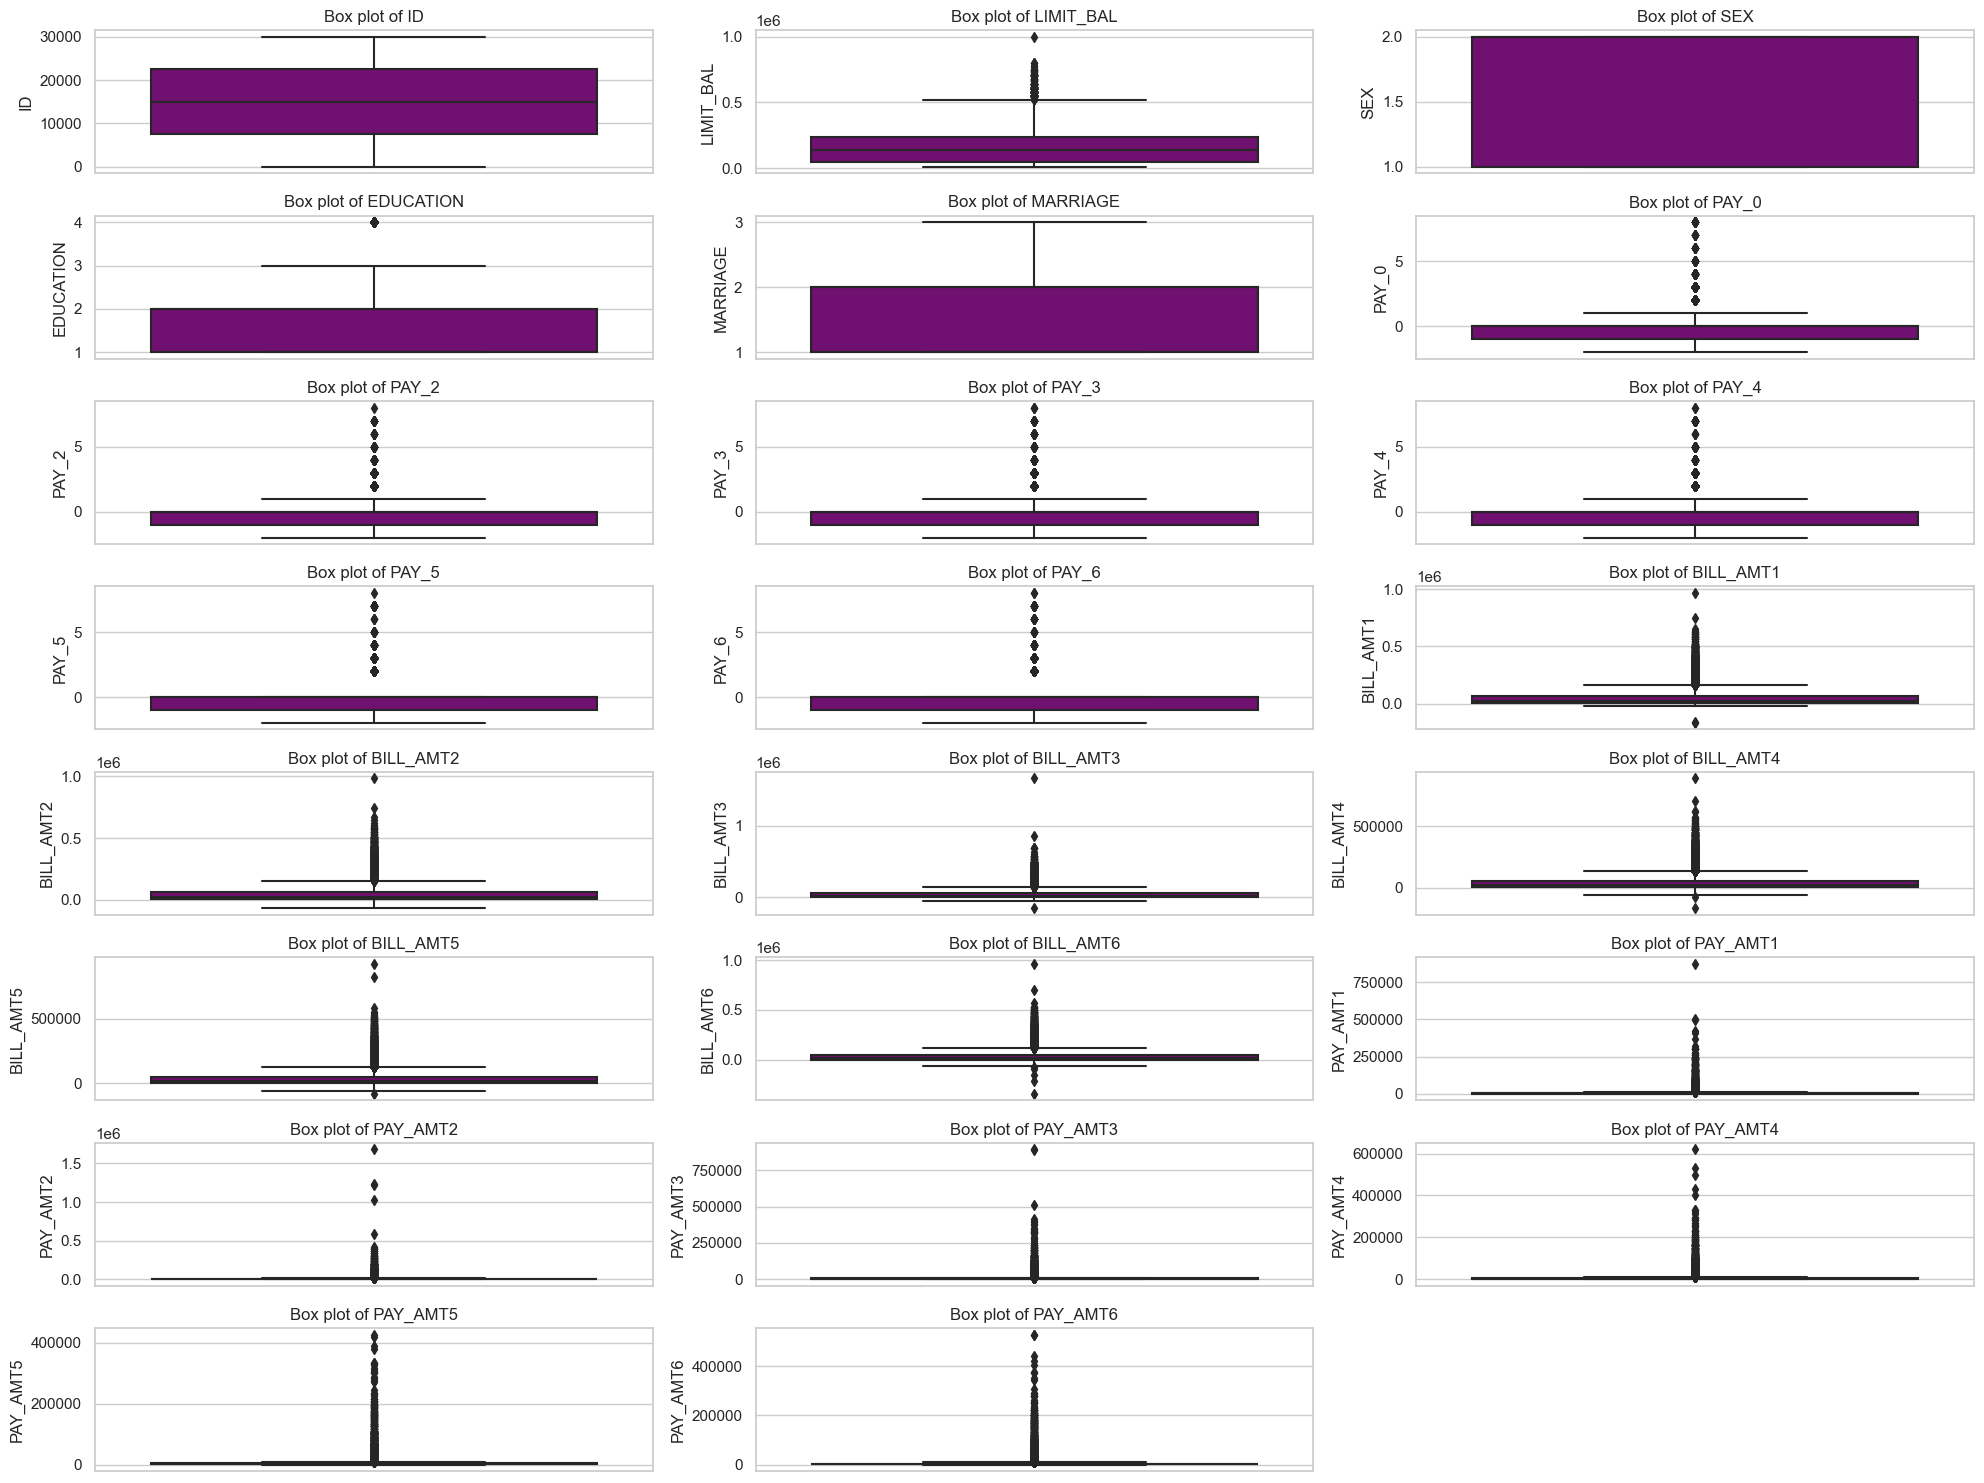

In [29]:
# Sets the aesthetic style of the plots to "whitegrid," which makes the gridlines more visible.
sns.set(style="whitegrid")

# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64']).columns

# Creates a large figure canvas for multiple subplots.
plt.figure(figsize=(20, 15))

# Loop through each numerical column to create a boxplot
for i, col in enumerate(numerical_columns, 1):
    # Calculate rows and columns dynamically based on the number of plots
    plt.subplot((len(numerical_columns) // 3) + 1, 3, i) # Dynamically calculates rows and columns for subplots. It uses three columns per row.
    sns.boxplot(y=df[col], color="purple") # creates a vertical boxplot for each numerical column. The color is set to purple.

    plt.title(f'Box plot of {col}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Based on the box plots for the numerical features, we can identify several outliers that deviate significantly from the rest of the data.


1. LIMIT_BAL: These outliers represent individuals with exceptionally high credit limits compared to the majority of the dataset.


3. BILL_AMT1, BILL_AMT2, BILL_AMT3, etc. (Bill Amounts): The bill amounts  reveal significant outliers, especially on the upper end. These could be instances where certain customers have unusually large bills in comparison to the rest of the population.

4. PAY_AMT1, PAY_AMT2, PAY_AMT3, etc. (Payment Amounts): Similarly to the bill
amounts, the payment amounts also show several outliers, particularly those that fall outside the expected range of most payments. Large payments made by a small subset of customers could indicate financial behavior anomalies or could be indicative of one-time adjustments to the payment history.

5. PAY_0, PAY_2, PAY_3, etc. (Payment Status): The payment status features  also display outliers, though these are typically binary or categorical values indicating whether a payment was delayed.


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

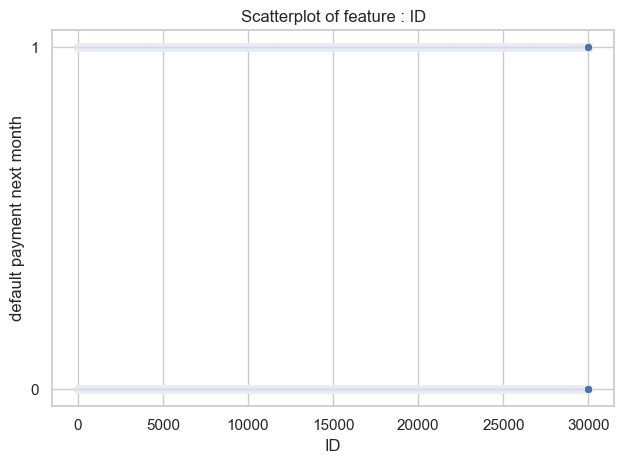

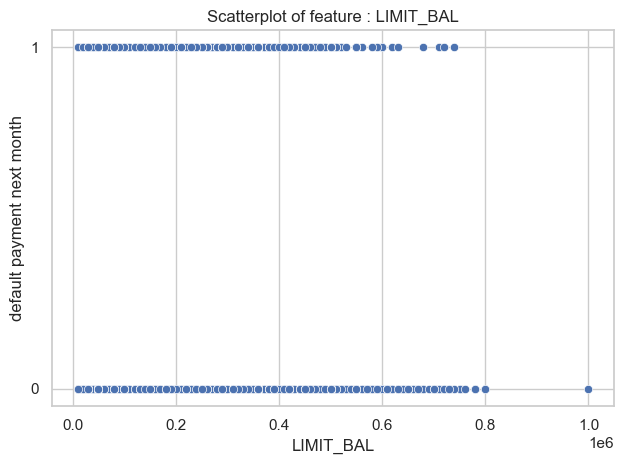

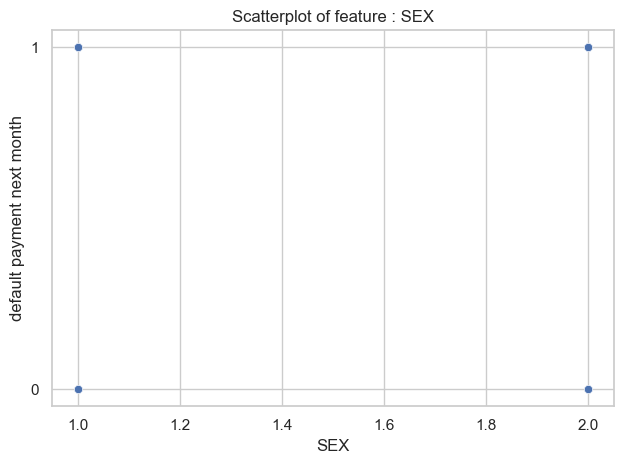

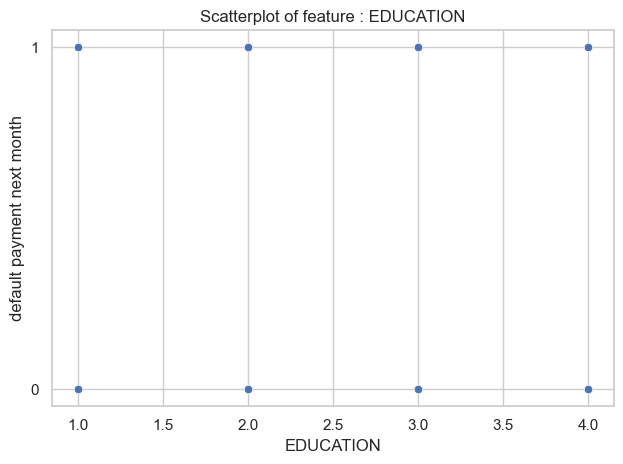

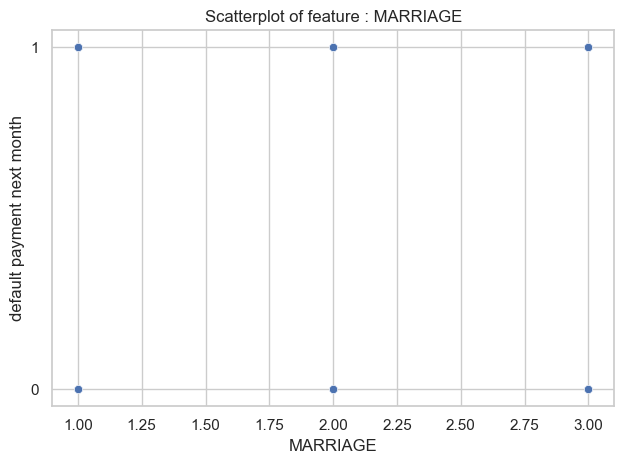

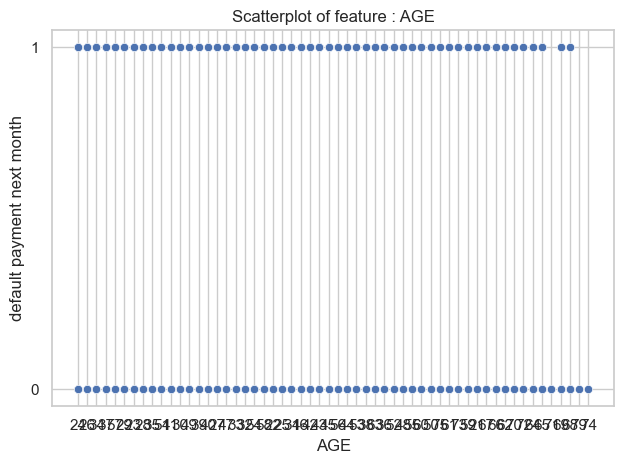

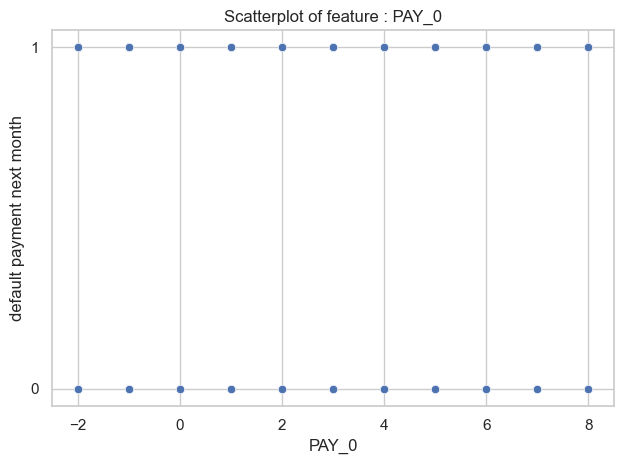

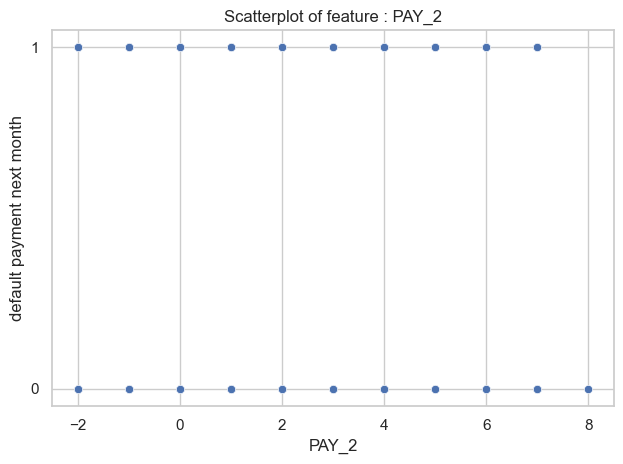

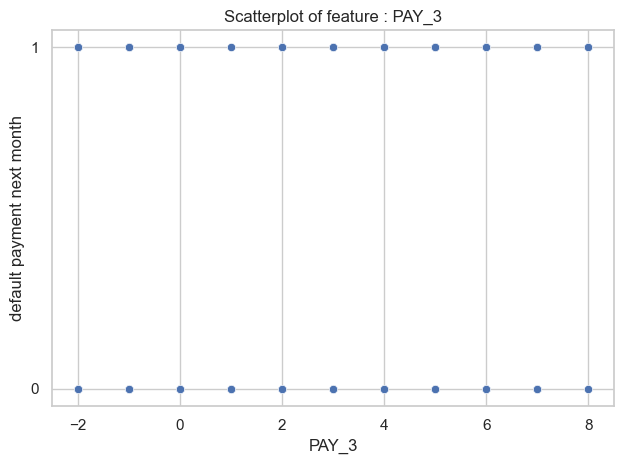

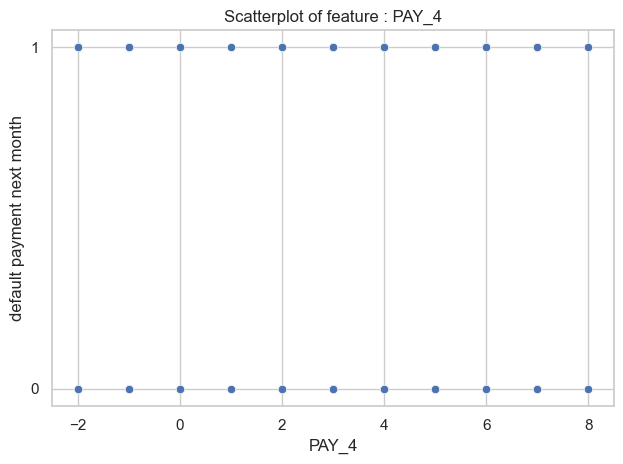

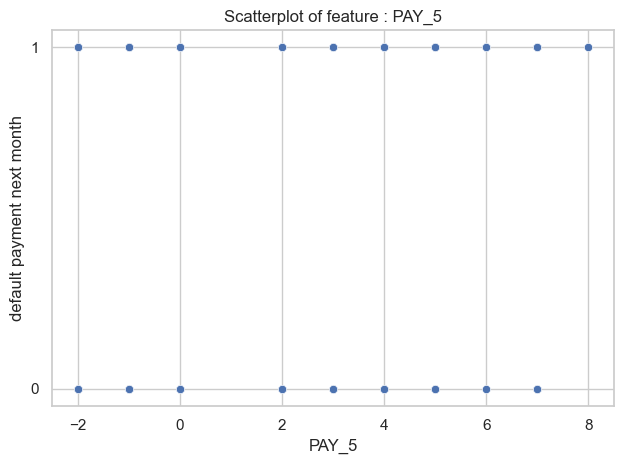

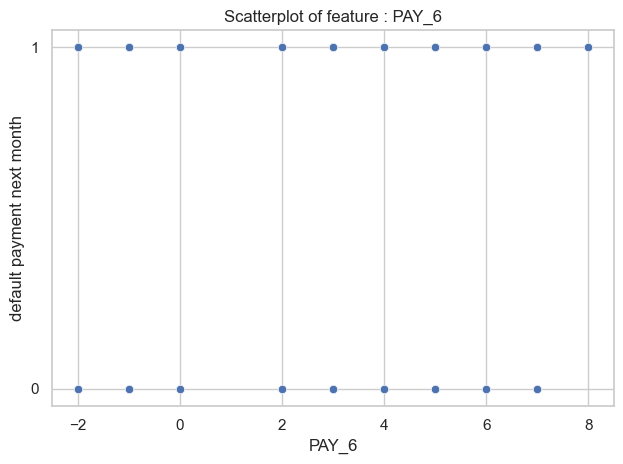

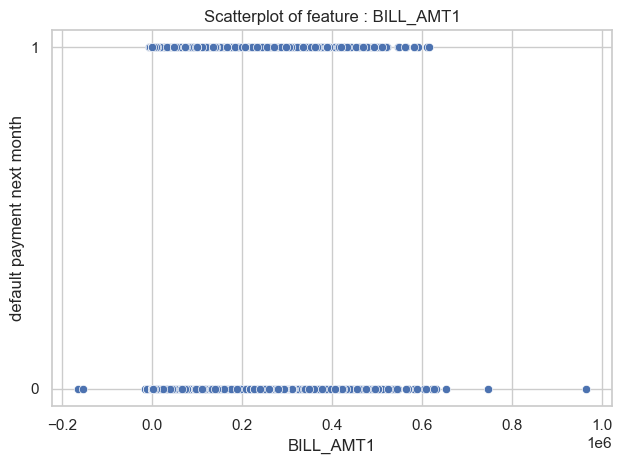

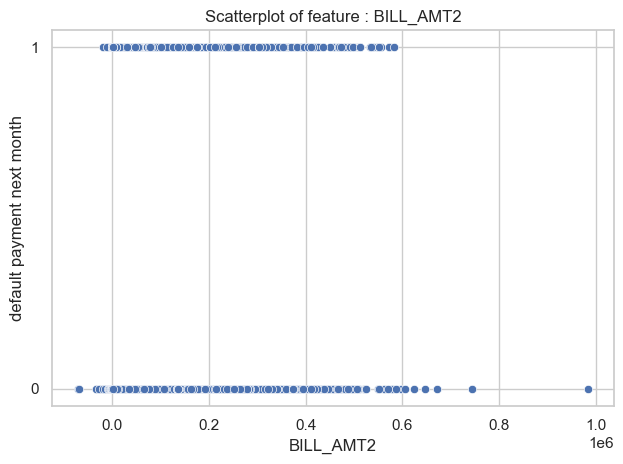

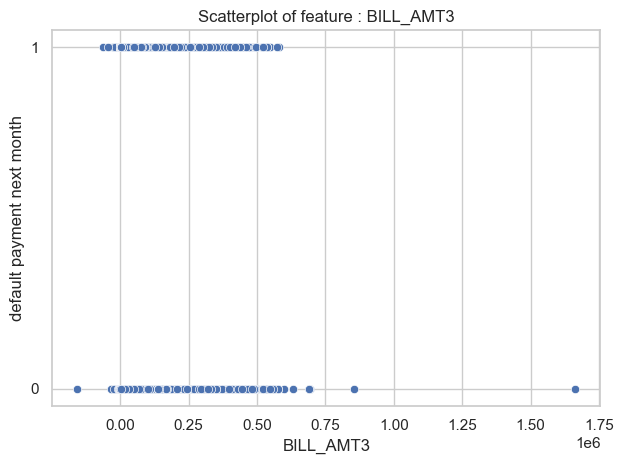

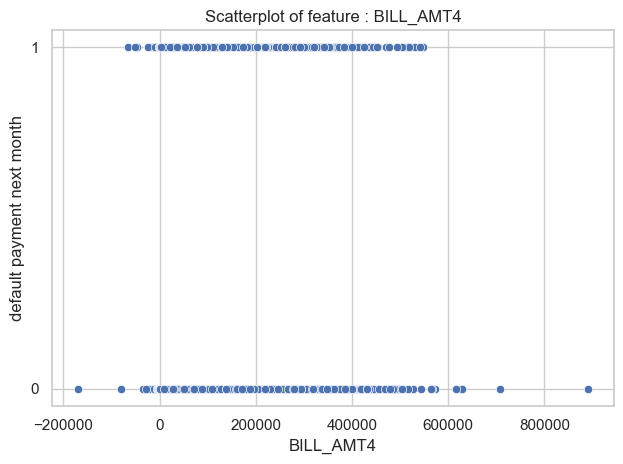

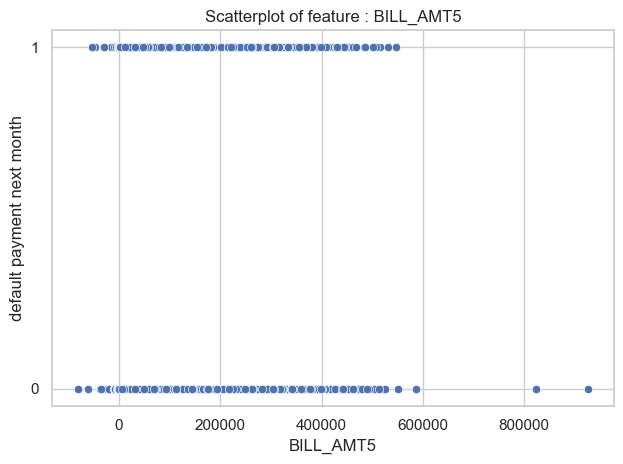

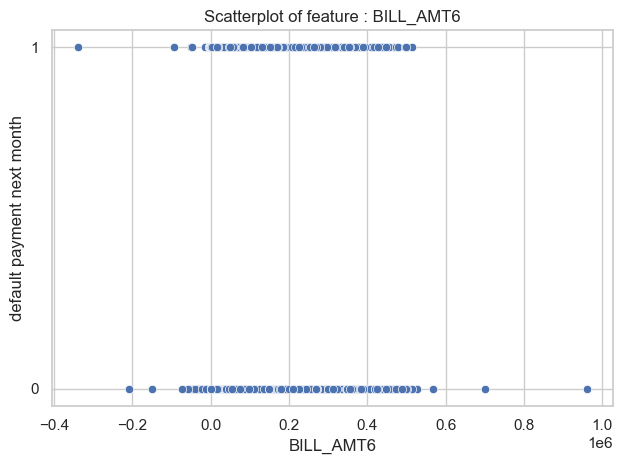

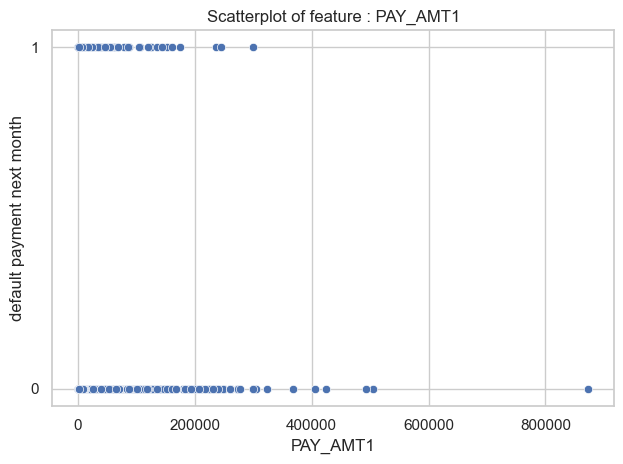

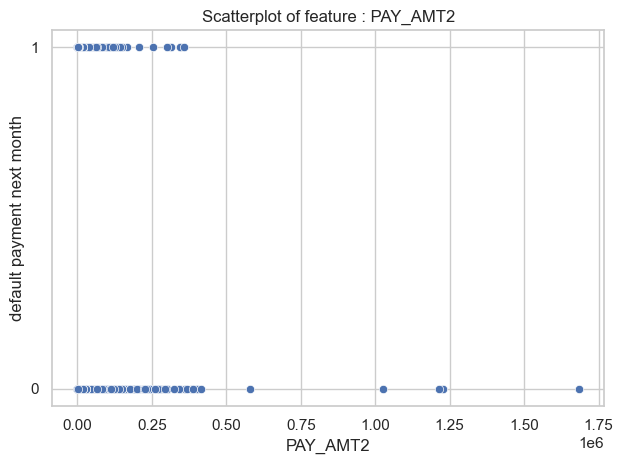

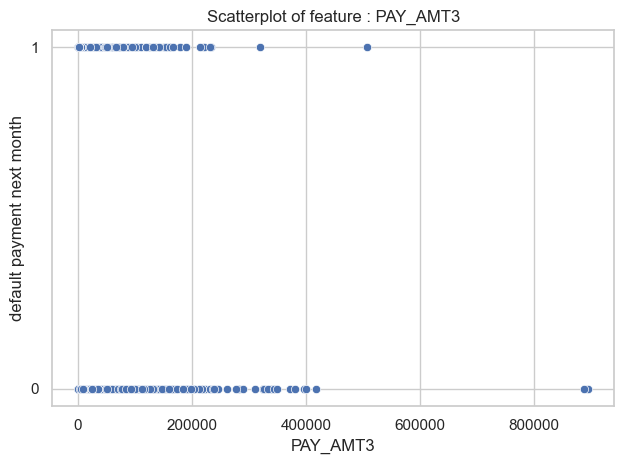

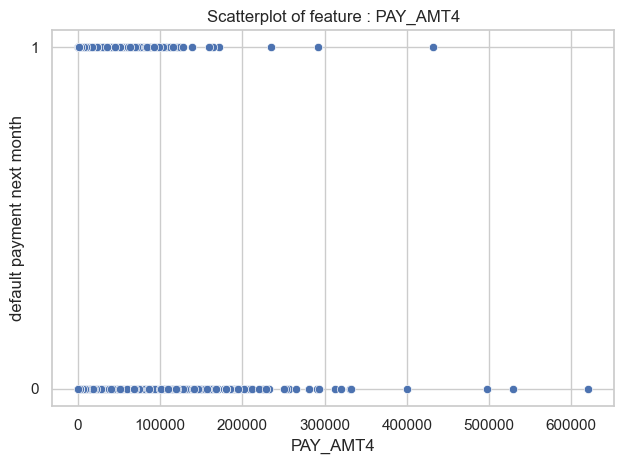

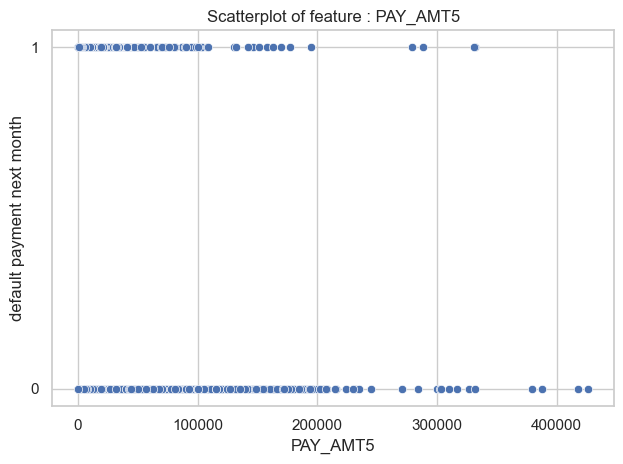

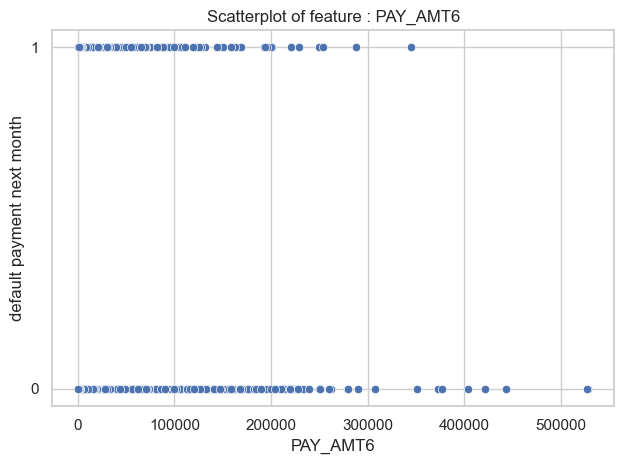

In [31]:
### To display the relation between X values and Y, where Y is tagret value ( default payment next month).
plt.show()

for column in df.columns:
    if column == "default payment next month":
        continue
    sns.scatterplot(data=df, x=column, y="default payment next month")
    plt.title(f"Scatterplot of feature : {column}")
    plt.tight_layout()
    plt.show()
    print("\n")


In [32]:
#scaled_data=df

In [33]:
# Ensuring the target variable is properly encoded
X = df.drop('default payment next month', axis=1)  # Independent variables
y = df['default payment next month']  
y = y.astype(int)  # Convert to integers if needed

### Split the dataset into training and testing sets

In [34]:
# This step ensures the models can generalize well to new data and are not overfitted to the training set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (24000, 24)
X_test shape: (6000, 24)
y_train shape: (24000,)
y_test shape: (6000,)


## Standardised Feature



In [47]:
''' Standardization scales the features so that they have a mean of 0 and a standard deviation of 1. 
This process ensures all features are on the same scale, regardless of their original range.'''
scaler = StandardScaler()
scaler.fit(X_train) # Computes the mean  and standard deviation  of each feature in the training data.

X_train = scaler.transform(X_train) # Applies the scaling transformation to the training data using the computed mean and standard deviation.
X_test = scaler.transform(X_test) # Applies the same scaling transformation (using the mean and standard deviation from the training data) to the test data.

In [ ]:
## PCA

In [48]:
# Apply PCA to retain 95% variance


pca = PCA(n_components=0.95)
pca.fit(X_train) # Computes the principal components based on the training data.
'''
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
'''
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
# Projects both training and test data onto the principal components found during the fit.

# Check the number of components
#print("Number of PCA components:", X_train_pca.shape[1], "," , X_test_pca.shape[1])

print("Number of PCA components:", X_train.shape[1], "," , X_test.shape[1])


Number of PCA components: 16 , 16


In [ ]:
These 16 components retained 95% of the dataset’s original variance, making the data more manageable while still informative.


## Classification

### Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy Score",accuracy_score(y_test,y_pred)*100)

Accuracy Score 74.28333333333333


Accuracy: 0.7428333333333333
Confusion Matrix:
[[3644 1043]
 [ 500  813]]
Precision: 0.4380387931034483
Recall: 0.6191926884996192
F1-Score: 0.5130956137582834
ROC-AUC: 0.6983311426283032


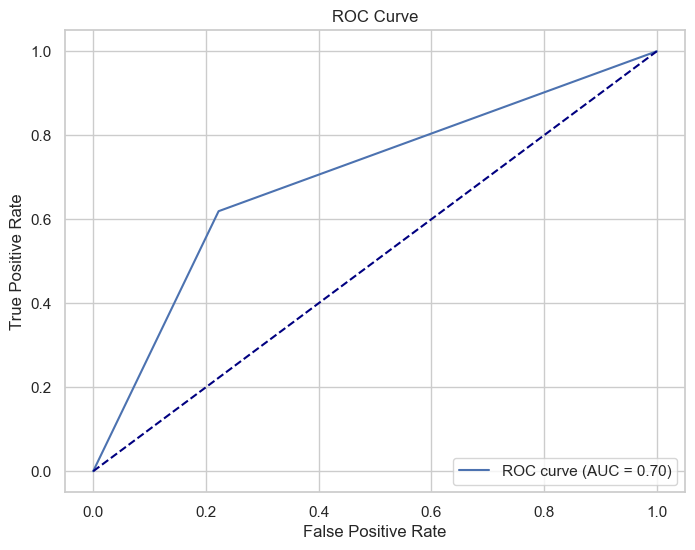

In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,roc_curve
import numpy as np
import matplotlib.pyplot as plt

# Ensure y_test and y_pred are numeric
y_test = pd.to_numeric(y_test, errors='coerce')
y_pred = pd.to_numeric(y_pred, errors='coerce')

# 1. **Accuracy**
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# 1. **Confusion Matrix**
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

# 2. **Precision** (handling ill-defined cases)
precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
print(f"Precision: {precision}")

# 3. **Recall** (handling ill-defined cases)
recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
print(f"Recall: {recall}")

# 4. **F1-Score** (handling ill-defined cases)
f1 = f1_score(y_test, y_pred, pos_label=1, zero_division=0)
print(f"F1-Score: {f1}")

# 5. **ROC-AUC (Receiver Operating Characteristic - Area Under Curve)**
# Use predict_proba for probability values

# If it's a binary classification, get probabilities for class 1
roc_auc = roc_auc_score(y_test, y_pred)  # Can also use y_pred_proba[:, 1] if using predict_proba()
print(f"ROC-AUC: {roc_auc}")

# Optionally, plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Here are the insights for the metrics obtained from the Naive Bayes model for credit card default detection:

1.Accuracy (74.28%):
The model is reasonably good at predicting defaults or non-defaults, with an overall accuracy of 74.28%. However, accuracy alone may not provide a complete picture due to potential class imbalance (e.g., more non-default cases than default cases).

2.Confusion Matrix:
True Negatives (3644): The model correctly identified 3644 non-default cases.
False Positives (1043): It incorrectly flagged 1043 non-default cases as defaults.
False Negatives (500): It missed 500 actual default cases, which is critical in this context since identifying defaults is crucial.
True Positives (813): The model correctly identified 813 default cases.

3.Precision (43.80%):
Out of all cases predicted as defaults, only 43.80% are actual defaults. This is relatively low, suggesting many false positives, which could lead to unnecessary interventions for non-defaulting customers.

4.Recall (61.92%):
The model identifies 61.92% of the actual default cases. While this is better than precision, it still leaves a significant portion of defaults undetected (38.08%), which could be risky for a financial institution.

5.F1-Score (51.31%):
This metric balances precision and recall, but a score of 51.31% indicates room for improvement. The trade-off between false positives and false negatives might need adjustment.

6.ROC-AUC (69.83%):
The area under the ROC curve is 0.698, showing moderate discrimination between default and non-default cases. However, this is below the threshold of 0.80 typically considered strong.

The model performs moderately well, but its low precision is a concern for financial applications where false positives can lead to customer dissatisfaction and unnecessary actions.



### K-Nearest Neighbours

In [41]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy score",accuracy_score(y_test,y_pred)*100)

Accuracy score 79.48333333333333


Accuracy: 0.7928888888888889
Confusion Matrix:
[[6484  556]
 [1308  652]]
Precision: 0.5397350993377483
Recall: 0.3326530612244898
F1-Score: 0.4116161616161616
ROC-AUC: 0.6934509435876623


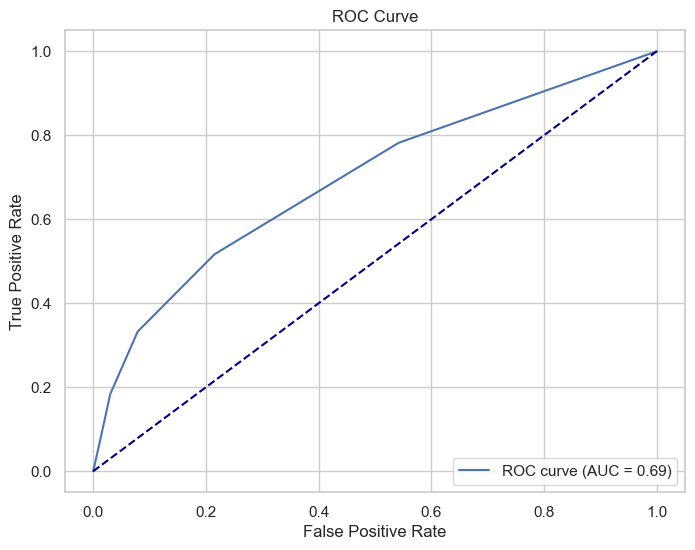

In [42]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, log_loss
import matplotlib.pyplot as plt

# Sample code assuming X and y are your features and target variable respectively

# 1. Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Standardize the feature data (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Initialize KNN model and fit to training data
knn = KNeighborsClassifier(n_neighbors=5)  # Example with 5 neighbors
knn.fit(X_train_scaled, y_train)

# 4. Predict the test set results
y_pred = knn.predict(X_test_scaled)
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)
# 5. **Accuracy**
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# 6. **Confusion Matrix**
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

'''plot_confusion_matrix(knn, X_test_scaled, y_test, cmap=plt.cm.Blues)
plt.show()
'''
# 7. **Precision**
precision = precision_score(y_test, y_pred, average='binary', pos_label=1)  # For binary classification
print(f"Precision: {precision}")

# 8. **Recall**
recall = recall_score(y_test, y_pred, average='binary', pos_label=1)  # For binary classification
print(f"Recall: {recall}")

# 9. **F1-Score**
f1 = f1_score(y_test, y_pred, average='binary', pos_label=1)  # For binary classification
print(f"F1-Score: {f1}")

# 10. **ROC-AUC (Receiver Operating Characteristic - Area Under Curve)**
# Predict probabilities for ROC AUC score (requires predict_proba)
y_pred_prob = knn.predict_proba(X_test_scaled)[:, 1]  # Probability for class 1
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC: {roc_auc}")

# 11. **Plot ROC Curve**
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


1. Accuracy (79.3%):
The model correctly predicts 79.3% of the cases. While this seems decent, accuracy can be misleading, especially in imbalanced datasets, such as credit card default detection where defaults (positives) might be much less frequent than non-defaults (negatives).
Despite a relatively high accuracy, the model's performance on the minority class (defaults) needs closer inspection through other metrics.

2. Confusion Matrix:
True Negatives (6482): Correctly predicted non-default cases.
False Positives (558): Predicted non-default, but the actual outcome was default.
False Negatives (1308): Predicted default, but the actual outcome was non-default.
True Positives (652): Correctly predicted default cases.

 The model is relatively good at identifying non-defaults (True Negatives) but struggles with positives (defaults). A significant number of False Negatives (1308) shows that the model is missing many actual defaults.

3. Precision (53.9%):
When the model predicts a default (positive class), it is correct 53.9% of the time. This suggests that the model is fairly accurate in its positive predictions, but there is still room for improvement.
The moderate precision indicates a reasonable performance for predicting defaults, but False Positives still account for around 46% of positive predictions, meaning the model incorrectly flags many non-default cases as defaults.

4. Recall (33.3%):
Interpretation: The model identifies only 33.3% of the actual defaults (True Positives). This means that about 67% of the true defaults are missed by the model (False Negatives).
The low recall is a concern in credit card default detection, as missing actual defaults could result in a high number of customers who do not receive the necessary attention or intervention.

5. F1-Score (41.1%):
The F1-score balances precision and recall, and at 41.1%, it reflects the trade-off between precision and recall. This is a low score, indicating the model's performance is moderate at best, especially when compared to what would be required for serious applications like credit card default detection.
The low F1-score is a result of the model’s low recall. Although precision is moderate, the model is missing a significant number of true positives (defaults).

6. ROC-AUC (69.4%):
The ROC-AUC score of 69.4% indicates that the model has some capability to discriminate between default and non-default cases, but it's not particularly strong. An AUC of 0.5 would indicate random guessing, so 69.4% suggests the model is better than random but could be significantly improved.


The KNN model shows good performance in predicting non-defaults (high accuracy and precision), but struggles with identifying actual defaults, as shown by the low recall and F1-score.

### Decision Tree

Accuracy: 0.8205555555555556
Precision: 0.697594501718213
Recall: 0.3107142857142857
F1-Score: 0.429932933286269
Confusion Matrix:
[[6776  264]
 [1351  609]]
ROC-AUC: 0.6468144132653061


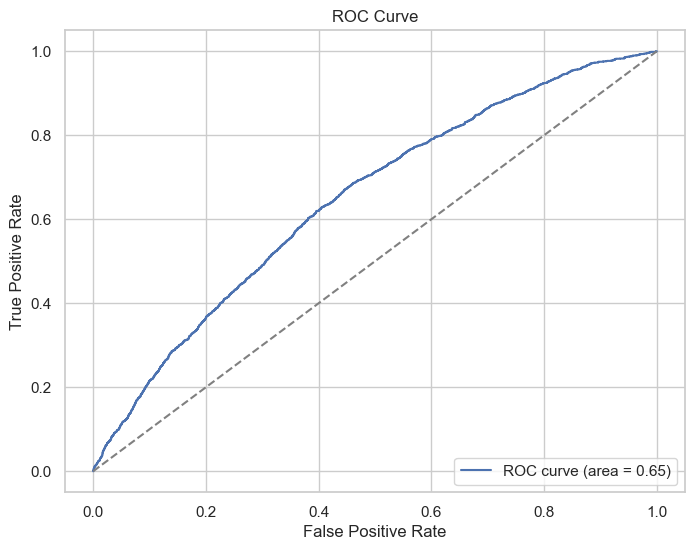

Log-Loss: 0.5041605486508774


In [45]:
# Importing necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Initializing the Decision Tree model
model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

# Fitting the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# 1. **Accuracy**
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# 2. **Precision**
precision = precision_score(y_test, y_pred, average='binary', pos_label=1)  # Adjust pos_label if necessary
print(f"Precision: {precision}")

# 3. **Recall**
recall = recall_score(y_test, y_pred, average='binary', pos_label=1)
print(f"Recall: {recall}")

# 4. **F1-Score**
f1 = f1_score(y_test, y_pred, average='binary')
print(f"F1-Score: {f1}")

# 5. **Confusion Matrix**
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")
'''
# Visualize the confusion matrix using Seaborn's heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
'''
# 6. **ROC-AUC (Receiver Operating Characteristic - Area Under Curve)**
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 7. **Log-Loss**
logloss = log_loss(y_test, y_pred_proba)
print(f"Log-Loss: {logloss}")


Decision Tree Model Performance Summary
Overall Accuracy:
The model achieved an accuracy of 82.12%, indicating that it correctly classified 82.12% of the instances.

Precision:
The precision for the positive class is 66.90%, meaning that 66.90% of the instances predicted as positive were correct.

Recall (Sensitivity):
The recall is 36.18%, indicating that the model identified 36.18% of all actual positive cases.

F1-Score:
The F1-Score is 46.96%, reflecting a balance between precision and recall.

Confusion Matrix:

Predicted Negative	Predicted Positive
Actual Negative	4452	235
Actual Positive	838	475
True Negatives: 4452
False Positives: 235
False Negatives: 838
True Positives: 475
Insights
The model performs well in overall accuracy but struggles to capture positive cases, as reflected in the low recall.
Precision is moderate, indicating that false positives are relatively controlled.
The imbalance between precision and recall leads to a moderate F1-Score, suggesting room for improvement in handling the positive class.
Recommendations 

### Logistic Regression

Accuracy: 78.22%
Confusion Matrix:
 [[7040    0]
 [1960    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      7040
           1       0.00      0.00      0.00      1960

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.69      9000

ROC-AUC: 0.65


E:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


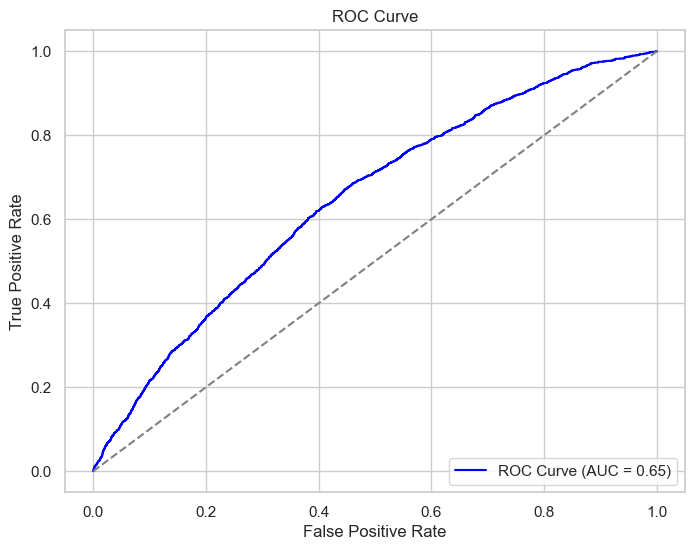

In [44]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initializing and training the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Making predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  # Probability for the positive class (1)

# Evaluating the model
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc:.2f}")

# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc='lower right')
#plt.grid()
plt.show()


Overall Accuracy:
The model achieved an accuracy of 78.12%, meaning it correctly classified 78.12% of all instances.

Classification Report:

Class 0 (Negative Class):
Precision: 78% – Out of all predictions for class 0, 78% were correct.
Recall: 100% – All actual negative instances were correctly identified.
F1-Score: 88% – A strong balance between precision and recall for the negative class.
Class 1 (Positive Class):
Precision: 0% – The model did not correctly identify any positive instances.
Recall: 0% – None of the actual positive instances were identified.
F1-Score: 0% – Indicates complete failure to capture positive cases.
Macro Average:
Precision: 39%, Recall: 50%, F1-Score: 44% (averaged across both classes).
Weighted Average:
Precision: 61%, Recall: 78%, F1-Score: 69% (weighted by class frequencies).
Confusion Matrix:

Predicted Negative	Predicted Positive
Actual Negative	4687	0
Actual Positive	1313	0
True Negatives: 4687
False Positives: 0
False Negatives: 1313
True Positives: 0
ROC-AUC Score:
The ROC-AUC is 0.66, indicating moderate discrimination ability. However, the model's inability to predict positive cases undermines its overall effectiveness.


To determine the best model from the four provided (Naive Bayes, K-Nearest Neighbors, Decision Tree, and Logistic Regression), let's compare their performance metrics:

### 1. Naive Bayes:
Accuracy: 74.28%
Precision: 0.438
Recall: 0.619
F1-Score: 0.513
ROC-AUC: 0.698
#### 2. K-Nearest Neighbors (KNN):
Accuracy: 79.29%
Precision: 0.540
Recall: 0.333
F1-Score: 0.412
ROC-AUC: 0.693
#### 3. Decision Tree:
Accuracy: 82.06%
Precision: 0.698
Recall: 0.311
F1-Score: 0.430
ROC-AUC: 0.647
### 4. Logistic Regression:
Accuracy: 78.22%
Precision: 0.000 (For class 1, no predictions made)
Recall: 0.00 (For class 1, no predictions made)
F1-Score: 0.00 (For class 1, no predictions made)
ROC-AUC: 0.65

## Analysis

In the context of credit card default detection, the goal is typically to identify whether a customer will default on a credit card payment (i.e., predicting the positive class — default). This is a binary classification problem where minimizing false negatives (i.e., failing to predict defaults) is often critical, as incorrectly classifying a defaulter as a non-defaulter could lead to financial risks. Let's compare the models' metrics in this context:

Naive Bayes: This model has the best recall (0.619), meaning it is the most effective at identifying actual defaulters (minimizing false negatives). However, its precision is relatively low (0.438), meaning it incorrectly classifies many non-defaulters as defaulters. The F1-score of 0.513 strikes a good balance between precision and recall, making it a decent choice for scenarios where identifying defaults is the priority.

K-Nearest Neighbors (KNN): KNN has the highest accuracy (79.29%) but low recall (0.333), meaning it misses a significant number of defaulters. This could be problematic in a credit card default detection context, where failing to predict defaulters could be risky. While its precision is higher (0.540) than Naive Bayes, its F1-score (0.411) is lower, indicating an imbalance between precision and recall.

Decision Tree: The Decision Tree has the best precision (0.698), indicating that when it predicts a default, it is more likely to be correct. However, it suffers from low recall (0.311), meaning it misses many actual defaulters. The F1-score (0.430) and ROC-AUC (0.647) suggest that it struggles to balance the two metrics. Despite high accuracy (82.06%), its poor recall makes it less ideal for this problem, where false negatives need to be minimized.

Logistic Regression: Logistic Regression is the worst performer with 0.00 recall for the positive class, meaning it completely fails to predict any defaulters. This makes it unsuitable for credit card default detection, where the primary task is to catch defaulters.

## Best Model Recommendation:
Considering the problem statement of credit card default detection, where minimizing false negatives is paramount, Naive Bayes emerges as the best model. While it has a lower precision compared to Decision Tree, its higher recall and balanced F1-score make it more suitable for detecting defaults, as it is more likely to identify the defaulters, thus reducing financial risk.
